# Teste!

## Programming for Data Science 
### Project Notebook: "Where should I live?" 
#### Group Members:
- Afonso Fernandes / 20241710
- Lourenço Lima / 20241711
- Pedro Jorge / 20241819
- David Morais / 20241759
## Introduction
In today’s connected world, people move and work in different countries more than ever before, making it harder to decide where to live. Many factors affect this decision, such as cost of living, job opportunities, safety, and overall quality of life. The European Commission’s Directorate-General for Employment, Social Affairs and Inclusion (DG EMPL) has recognized this challenge and launched an initiative to help citizens make better informed decisions about where to live across Europe.  
This project, “Where Should I Live?”, is part of the Programming for Data Science (PDS) course. Its main goal is to analyze data about European cities and develop insights and tools that support individuals in identifying locations that best align with their personal and professional goals.  
Through a data-driven approach, the project aims to:
- Clean and analyze a dataset containing key indicators
- Explore relationships and patterns between socioeconomic variables across different European countries
- Implement advanced techniques, including web scraping and geographical visualization, to build an interactive map of European cities
- Develop a practical analytical tool or recommendation framework that helps users compare cities and make more informed relocation choices  

This project seeks to transform raw data into meaningful insights, providing a transparent, interpretable, and engaging way to understand how different European cities compare in terms of economic and social well-being.

### Data Wrangling and Analysis
In this part of the project, the goal is to prepare and explore the dataset that contains information about different European cities. Before any advanced analysis or visualization, it is essential to make sure the data is clean, consistent, and ready to use.  
The goal of this part is to:
- Import and examine the dataset
- Handle missing and duplicated values
- Explore and summarize key statistics

#### Import essential libraries and define an alias for them

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

#### Import the CSV File "city_data.csv" and inspecting the dataset

In [3]:
city_data = pd.read_csv('city_data.csv', sep = '|', header = 1)

print("Shape of dataset:", city_data.shape)
city_data.head()

Shape of dataset: (86, 14)


,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22 00:00:00
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09 00:00:00
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00


In [4]:
city_data.rename(columns = {'Avgerage Rent Price' : 'Average Rent Price'}, inplace = True) # fixing the typo in the column name

city_data.info() # To get information about columns and data types
print("")
city_data.describe().T # To get summary statistics of numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   City                             86 non-null     object 
 1   Population Density               85 non-null     float64
 2   Population                       86 non-null     int64  
 3   Working Age Population           85 non-null     float64
 4   Youth Dependency Ratio           86 non-null     float64
 5   Unemployment Rate                85 non-null     float64
 6   GDP per Capita                   85 non-null     float64
 7   Days of very strong heat stress  86 non-null     int64  
 8   Main Spoken Languages            85 non-null     object 
 9   Average Monthly Salary           86 non-null     int64  
 10  Average Rent Price               86 non-null     int64  
 11  Average Cost of Living           86 non-null     int64  
 12  Average Price Groceries 

,count,mean,std,min,25%,50%,75%,max
Population Density,85.0,1.115141e+03,2.542779e+03,65.00,304.000,548.00,1020.000,20983.0
Population,86.0,1.754370e+06,1.843133e+06,73895.00,528118.500,1178397.00,2315896.000,12396541.0
Working Age Population,85.0,1.158294e+06,1.232534e+06,46359.00,358020.000,733794.00,1534225.000,8274794.0
Youth Dependency Ratio,86.0,2.409686e+01,3.266421e+00,19.30,21.425,23.15,25.925,37.8
Unemployment Rate,85.0,6.667059e+00,4.553632e+00,1.40,3.700,5.30,8.100,23.0
GDP per Capita,85.0,5.175027e+04,2.149562e+04,10089.92,38664.000,49329.00,63083.000,146094.0
Days of very strong heat stress,86.0,4.348837e+00,1.003848e+01,0.00,0.000,1.00,3.000,59.0
Average Monthly Salary,86.0,2.434488e+03,1.188603e+03,750.00,1412.500,2400.00,3200.000,6636.0
Average Rent Price,86.0,1.070105e+03,4.989646e+02,100.00,800.000,1050.00,1250.000,3190.0
Average Cost of Living,86.0,1.808384e+03,7.279997e+02,800.00,1300.000,1665.00,2100.000,4862.0


In [5]:
# Percentage of missing data per column
(city_data.isnull().sum() / len(city_data) * 100).sort_values(ascending=False).head(10)

Average Price Groceries            93.023256
Population Density                  1.162791
Working Age Population              1.162791
Unemployment Rate                   1.162791
GDP per Capita                      1.162791
Main Spoken Languages               1.162791
City                                0.000000
Population                          0.000000
Youth Dependency Ratio              0.000000
Days of very strong heat stress     0.000000
dtype: float64

From the summary of the dataset, most columns are well populated and contain relevant information such as GDP per capita, unemployment rate, average salary, and cost of living.
However, a few columns contain missing values. In particular, the column “Average Price Groceries” only has a few non-null entries (6 values), which means it is almost entirely empty.

Since this variable contains too much missing data to be reliable, it will likely be excluded from further analysis.
Other columns have only one or two missing values, which can be handled by filling them with median values (for numerical data) or with the mode (for categorical data).

Overall, the dataset is mostly complete, and we can proceed to the data cleaning step before analysis.

#### 1.1 Handling Missing and Duplicated Values
Before continuing the analysis, we need to ensure that the dataset is clean. So we will identify missing values in each column, decide if we want to remove, replace or keep them depending on the context and finally check for duplicate records and remove them if necessary. But first we will remove the column "Average Price Groceries".

In [6]:
city_data = city_data.drop(columns =['Average Price Groceries'], axis= 1) #dropping the column with too many null values as it doesnt add much value to the analysis

city_data = city_data.fillna(city_data.median(numeric_only=True)) # filling null values with the median of the column because most numerical columns dont have a normal distribution
city_data = city_data.fillna(city_data.mode().iloc[0]) # filling null values with the mode of the column for categorical columns

# Check duplicates
duplicates = city_data.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Remove duplicates if any
city_data = city_data.drop_duplicates()
print("Shape after removing duplicates:", city_data.shape)
city_data

Duplicate rows: 2
Shape after removing duplicates: (84, 13)


,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15 00:00:00
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,2023-11-03 00:00:00
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22 00:00:00
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09 00:00:00
4,"Gent, Belgium",552.0,645813,417832.0,24.8,5.3,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,"Stockholm, Sweden",334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,1400,2300,2024-09-11 00:00:00
82,"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,2023-03-10 00:00:00
83,"Malmo, Sweden",368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,1100,2000,2024-07-07 00:00:00
84,"Ankara, Turkiye",1922.0,4843511,3417691.0,30.0,14.4,38916.0,3,Turkish,900,450,900,2023-06-08 00:00:00


### Exploring and Analyzing the Data
Now that the dataset is clean, we can explore its content to extract meaningful insights about European cities.  
In this section, we will answer the analytical questions defined in the project guidelines and visualize key relationships in the data.  
We will:
- Identify which countries and cities are most represented in the dataset
- Examine the distribution of spoken languages and update dates
- Explore economic indicators such as GDP per capita, unemployment rate, and cost of living
- Determine which cities offer the best balance between salary and expenses
- Highlight additional findings that help describe living conditions across Europe  

These analyses will help us better understand how economic and social factors vary between European cities, and will provide a foundation for the next steps of the project.

In [7]:
city_data['City'] = city_data['City'].str.replace(';', ',') # replacing ; with , for consistency
city_data['City'] = city_data['City'].str.replace('.', ',') # replacing . with , for consistency

city_data.insert(0, 'Country', city_data['City'].str.split(',').str[-1].str.strip()) 
city_data['City'] = city_data['City'].str.split(',').str[0].str.strip()
city_data.loc[45, ['City', 'Country']] = city_data.loc[45, ['Country', 'City']].values # fixing the swapped values in row 45

# 1. Sort the DataFrame by 'Country' to ensure cities are grouped sequentially
city_data.sort_values(by=['Country', 'City'], inplace=True)

# 2. Set a MultiIndex using 'Country' and 'City'
# This creates the desired visual structure upon printing.
structured_data = city_data.set_index(['Country', 'City'])

structured_data.head(16)

Population Density  Population  Working Age Population   \
Country  City                                                                  
Austria  Salzburg                 243.0      375489                 250472.0   
         Vienna                   310.0     2983513                2018818.0   
Belgium  Antwerp                  928.0     1139663                 723396.0   
         Bruges                   840.0      119765                  74600.0   
         Brussels                 681.0     3284548                2137425.0   
         Gent                     552.0      645813                 417832.0   
Bulgaria Dobrich                  640.0       73895                  46359.0   
         Sofia                    272.0     1553106                1043522.0   
Croatia  Split                    120.0      354264                 230745.0   
         Zagreb                   240.0     1217131                 800501.0   
Cyprus   Lefkosia                 130.0      356400                 237000.0   
         Lemesos                  190.0      262238                 173906.0   
Czechia  Ostrava                  499.0      711860                 464578.0   
         Prague                   388.0     2231212                1445800.0   
Denmark  Copenhagen               598.0     1933919                1280970.0   
         Odense                   160.0      382711                 245174.0   

                     Youth Dependency Ratio  Unemployment Rate  \
Country  City                                                    
Austria  Salzburg                     20.30                3.0   
         Vienna                       20.10               10.2   
Belgium  Antwerp                      27.70                6.2   
         Bruges                       25.63                5.6   
         Brussels                     27.50               10.7   
         Gent                         24.80                5.3   
Bulgaria Dobrich                      22.85                4.6   
         Sofia                        21.40                2.3   
Croatia  Split                        22.90                6.5   
         Zagreb                       22.70                2.7   
Cyprus   Lefkosia                     23.06                9.6   
         Lemesos                      23.06               11.2   
Czechia  Ostrava                      23.00                3.7   
         Prague                       26.20                1.4   
Denmark  Copenhagen                   25.40                6.5   
         Odense                       24.70                9.5   

                     GDP per Capita  Days of very strong heat stress  \
Country  City                                                          
Austria  Salzburg          66689.00                                0   
         Vienna            55770.00                                3   
Belgium  Antwerp           57595.00                                3   
         Bruges            63083.00                                0   
         Brussels          62500.00                                3   
         Gent              53311.00                                2   
Bulgaria Dobrich           10089.92                                0   
         Sofia             43563.00                                0   
Croatia  Split             21560.00                                1   
         Zagreb            38664.00                                4   
Cyprus   Lefkosia          34907.00                               45   
         Lemesos           49329.00                                0   
Czechia  Ostrava           30105.00                                0   
         Prague            64996.00                                1   
Denmark  Copenhagen        63540.00                                0   
         Odense            40304.00                                0   

                                 Main Spoken Languages  \
Country  City                       

During the data preparation stage, it was noticed that the City column contained both the city and its corresponding country in a single field.  
To facilitate analysis, these were separated into two distinct columns: City and Country.  
This step ensures that geographical and statistical analyses can be performed accurately.

To present the detailed information for all cities while using the Country column as a hierarchical header, allowing us to see all metrics (e.g., Population, GDP per Capita, Avg_Salary) for a city within its national context, we used the multilndex technique

##### Calculating Total Population by Country 

The following code block calculates the total population of each country, based on the sum of the populations of all cities from that country included in our city_data dataset.

In [8]:
population_by_country = city_data.groupby('Country')[['Population']].sum().sort_values(by = 'Population', ascending = False)
print(population_by_country)

                 Population
Country                    
Germany            24284580
United Kingdom     19334419
Spain              16084265
Italy              15749651
Netherlands         7485080
Turkiye             5918054
Poland              5499808
Belgium             5189789
Portugal            4800565
Greece              4580939
Sweden              4062134
Hungary             3609234
Austria             3359002
France              3142458
Czechia             2943072
Switzerland         2532149
Ireland             2410343
Denmark             2316630
Norway              2158259
Finland             1951510
Bulgaria            1627001
Croatia             1571395
Latvia               930245
Cyprus               618638
Luxembourg           610825
Malta                456490
Slovak Republic      440611
Estonia              390860
Romania              351851
Slovenia             292988


#### 1.2 a) Country Frequency Analysis

In [9]:
# Count the number of cities per country
country_counts = city_data['Country'].value_counts()

print("Most frequent country:", country_counts.index[0], "with", country_counts.iloc[0], "cities")

country_counts.head()

Most frequent country: Germany with 10 cities


Country
Germany           10
Italy              6
United Kingdom     5
Spain              5
Netherlands        5
Name: count, dtype: int64

The dataset includes cities from multiple European countries.  
The country with the largest representation is Germany, with 10 cities, which may indicate higher urban coverage or data availability.  
The top five countries provide an overview of the dataset’s geographic balance.

#### 1.2 b) Total Cities and Greece Count Analysis

In [10]:
# Total unique cities
total_cities = city_data['City'].nunique()

# Cities in Greece
cities_greece = city_data[city_data['Country'] == 'Greece']['City'].nunique()

print(f"Total number of cities: {total_cities}")
print(f"Number of cities in Greece: {cities_greece}")


Total number of cities: 84
Number of cities in Greece: 2


There are 84 total cities in the dataset, of which 2 are in Greece.  
This gives an idea of the dataset’s overall coverage and shows the presence of Greek cities for further country-specific analysis.

#### 1.2 c) Language Distribution Analysis

In [11]:
# Split 'Main Spoken Languages' into a list of individual languages
city_data['Individual Languages'] = city_data['Main Spoken Languages'].str.split(',').apply(lambda x: [i.strip() for i in x])

# Expand the list into multiple rows (so each language counts individually)
exploded_languages = city_data.explode('Individual Languages')

# Find the least and most spoken languages across all cities
language_counts = exploded_languages['Individual Languages'].value_counts()
least_spoken_languages_list = language_counts[language_counts == 1].index.tolist()
top_3_languages = exploded_languages['Individual Languages'].value_counts().nlargest(3).index.tolist()
print(language_counts.tail(13)) # Displaying the least spoken languages (those with only 1 appearance)
print(" ")
print(language_counts.head(3))  # Displaying the top 3 most spoken languages

# Display results
print(f"\nThere is not a single least spoken language as there are a lot of languages wiht only 1 appearance in the dataset, those are {', ' .join(least_spoken_languages_list)}.\n")
print(f"The top 3 most spoken languages are {', '.join(top_3_languages)}, respectively.")

Individual Languages
Latvian              1
Luxembourgish        1
Maltese              1
Estonian             1
Romanian             1
Slovak               1
Slovene              1
Serbian              1
Catalan              1
Spanish;Valencian    1
Scots Gaelic         1
Scots                1
Bengali              1
Name: count, dtype: int64
 
Individual Languages
English    46
German     14
Turkish    10
Name: count, dtype: int64

There is not a single least spoken language as there are a lot of languages wiht only 1 appearance in the dataset, those are Latvian, Luxembourgish, Maltese, Estonian, Romanian, Slovak, Slovene, Serbian, Catalan, Spanish;Valencian, Scots Gaelic, Scots, Bengali.

The top 3 most spoken languages are English, German, Turkish, respectively.


To ensure each language is counted individually, the “Main Spoken Languages” column was split into separate items using the explode() method.  
This allows cities with multiple official languages (e.g., “Dutch, English”) to contribute counts to both languages instead of being treated as a single combined category.  
The results show which languages are most and least represented across European cities, giving a clearer picture of linguistic diversity.  

## Review this 
The dataset shows that the most commonly spoken language among the listed European cities is Italian, appearing in 7 cities.  
It is followed by Dutch/English (5 cities) and German (4 cities).  
This suggests that the dataset includes a strong representation from regions such as Italy, the Netherlands, and Germany.  

On the other hand, the least spoken language is Maltese/English, which appears only once.  
This indicates that smaller countries or cities with less international presence (like Malta) are underrepresented in the dataset.  

Overall, this analysis highlights the linguistic diversity across European cities and shows how some languages dominate larger regions, while others are specific to small or unique locations.  

#### 1.3 Data Update Status Analysis

In [12]:
#Convert to datetime
city_data['Last Data Update'] = pd.to_datetime(city_data['Last Data Update'], errors='coerce')

#Cities last updated before April 2023
old_entries = city_data[city_data['Last Data Update'] < '2023-04-01']

#Most recent update
latest_date = city_data['Last Data Update'].max()
days_since_update = (datetime.now() - latest_date).days

print("Cities that might require new data:")
display(old_entries[['City', 'Country', 'Last Data Update']])

print(f"\nMost recent update: {latest_date.strftime('%d %B %Y')} ({days_since_update} days ago).")


Cities that might require new data:


,City,Country,Last Data Update
38,Lyon,France,2023-03-31
20,Frankfurt am Main,Germany,2023-02-04
18,Munich,Germany,2023-03-16
59,Venice,Italy,2023-03-23
82,Gothenburg,Sweden,2023-03-10
10,Basel,Switzerland,2023-01-19



Most recent update: 12 December 2024 (332 days ago).


The update column shows that most data points are relatively recent.  
A few cities were last updated before April 2023 and may require verification.  
The most recent data update occurred on 12 December 2024, approximately 331 days ago, meaning the dataset is still fairly up to date for analysis.

#### 1.4 a) GDP per Capita vs. Unemployment Rate Analysis

First we use histograms to vizualize the distribution of Unemployment Rate and GDP per Capita as we are analyzing continuous numerical data. Then we use a scatterplot to show how both variables are related. 

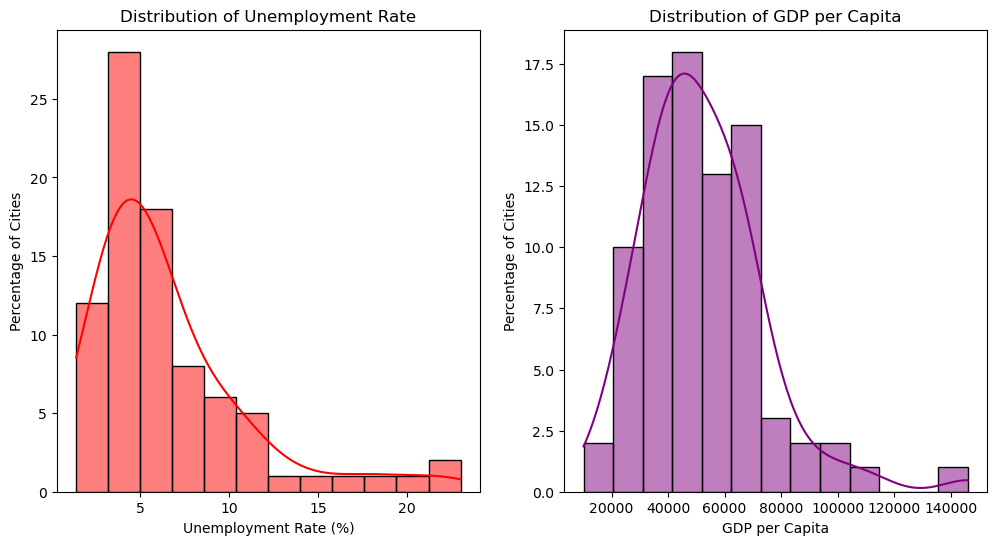

In [13]:
plt.figure(figsize=(12,6))
#Subplot Unemployment Rate Distribution 
plt.subplot(1, 2, 1) # 1 row, 2 columns, first subplot
sns.histplot(city_data['Unemployment Rate'], kde = True, color = 'red')
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Percentage of Cities')

#Subplot for GDP per Capita Distribution 
plt.subplot(1, 2, 2) # 1 row, 2 columns, second subplot
sns.histplot(city_data['GDP per Capita'], kde = True, color = 'purple')
plt.title('Distribution of GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Percentage of Cities')

plt.show()

From the histograms we can see that both of them are right skewed, while most cities have a low unemployment rate, below 10%, there are still some cities with a quite high unemployment rate (15-20%), most cities have a low or medium GDP per capita in the 20k to 70k range, with very few cities having a very high GDP per capita above 100k. This shows that most cities are moderately wealthy, with only a few being extremely wealthy and a couple of other cities that are not so wealthy.

In [14]:
fig1 = px.scatter(city_data, x = 'GDP per Capita', y = 'Unemployment Rate', title='Relationship between GDP per Capita and Unemployment Rate', labels={'GDP per Capita':'GDP per Capita', 'Unemployment Rate':'Unemployment Rate (%)'}, hover_name='City', hover_data=['Country'])
fig1.show()

The scatter plot reveals a generally negative relationship between GDP per Capita and Unemployment Rate: cities with higher GDP per capita tend to have lower unemployment levels, suggesting stronger and more stable economies.  

Most of the data points are concentrated between €30,000 and €70,000 GDP per capita, with unemployment rates ranging roughly from 2% to 10%.  
This cluster represents the majority of European cities, reflecting that in wealthier cities there are, generally, more job opportunities and hence a lower unemployment rate. 

There is, however, one noticeable outlier, Bulgaria with a relatively low GDP, 10080€, that still maintains low unemployment 4.6%.  
This outlier suggests that factors beyond GDP, such as local economic structures or national employment policies, may influence unemployment rates.

#### 1.4 b) Salary vs Cost of Living Analysis

To better understand economic well-being and quality of life across European cities, we calculate a new variable called Spendable Income, defined as:  
- Spendable Income = Average Monthly Salary − Average Cost of Living  

This metric estimates how much disposable income a typical resident retains after covering basic expenses, offering a clearer view of affordability and purchasing power across cities.

 Top 5 Cities with the Best Relationship between Salary and Cost of Living:


,City,Country,Spendable Income
0,Basel,Switzerland,2127
1,Tampere,Finland,1900
2,Helsinki,Finland,1850
3,Zurich,Switzerland,1774
4,Geneva,Switzerland,1531



 Bottom 5 Countries with the Worst Average Relationship:


,Country,Spendable Income
21,Portugal,-207.500000
11,Greece,-125.000000
23,Slovak Republic,-50.000000
28,Turkiye,-25.000000
20,Poland,-16.666667



Summary:
The 5 countries with the worst salary-to-cost relationship are: Portugal, Greece, Slovak Republic, Turkiye, Poland.
The top 5 cities with the best relationship are: Basel, Tampere, Helsinki, Zurich, Geneva.



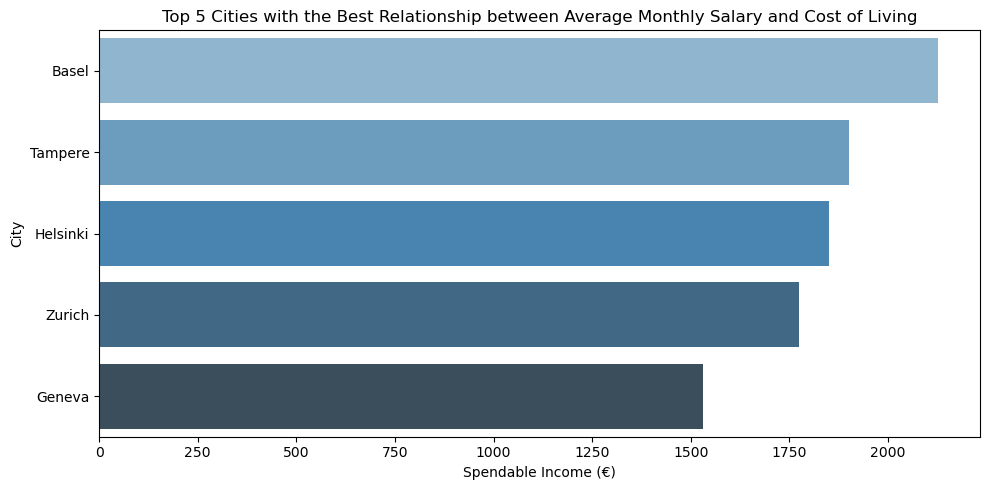

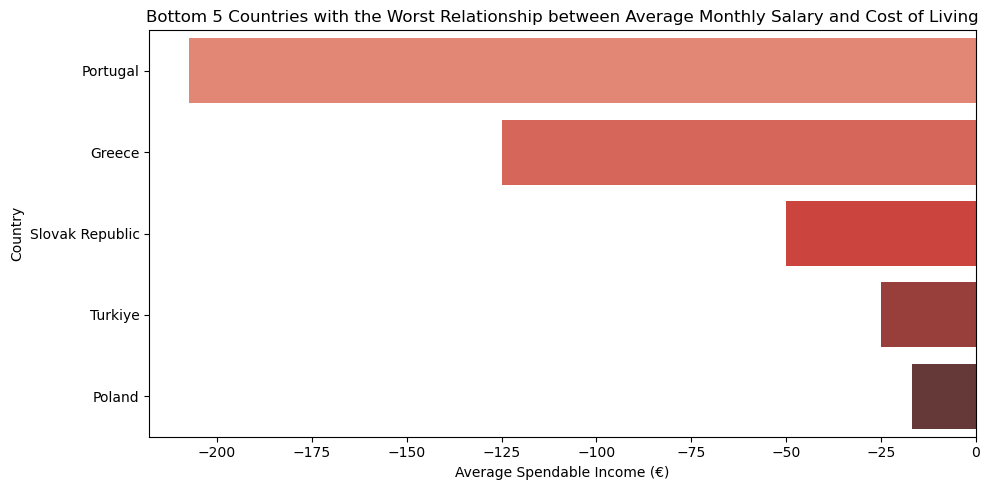

In [15]:
# Calculate Spendable Income (Salary - Cost of Living)
city_data['Spendable Income'] = city_data['Average Monthly Salary'] - city_data['Average Cost of Living']

#Top 5 cities with highest Spendable Income
top5_cities_diff = (
    city_data.nlargest(5, 'Spendable Income')[['City', 'Country', 'Spendable Income']]
    .reset_index(drop=True)
)
top5_cities_list = top5_cities_diff['City'].tolist()

#Bottom 5 countries with lowest average Spendable Income
bot5_country_avg_diff = (
    city_data.groupby('Country', as_index=False)['Spendable Income']
    .mean()
    .sort_values(by='Spendable Income', ascending=True)
    .head(5)
)
bot5_countries_list = bot5_country_avg_diff['Country'].tolist()

#Text summary of findings
print(" Top 5 Cities with the Best Relationship between Salary and Cost of Living:")
display(top5_cities_diff)

print("\n Bottom 5 Countries with the Worst Average Relationship:")
display(bot5_country_avg_diff)

print(f"\nSummary:\nThe 5 countries with the worst salary-to-cost relationship are: {', '.join(bot5_countries_list)}.")
print(f"The top 5 cities with the best relationship are: {', '.join(top5_cities_list)}.\n")

#Visualization: Top 5 Cities
plt.figure(figsize=(10, 5))
sns.barplot(
    data=top5_cities_diff,
    x='Spendable Income',
    y='City',
    hue='City',          # add hue for coloring
    palette='Blues_d',
    legend=False         # hide redundant legend
)
plt.title('Top 5 Cities with the Best Relationship between Average Monthly Salary and Cost of Living')
plt.xlabel('Spendable Income (€)')
plt.ylabel('City')
plt.tight_layout()
plt.show()

#Visualization: Bottom 5 Countries
plt.figure(figsize=(10, 5))
sns.barplot(
    data=bot5_country_avg_diff,
    x='Spendable Income',
    y='Country',
    hue='Country',       # add hue for coloring
    palette='Reds_d',
    legend=False         # hide redundant legend
)
plt.title('Bottom 5 Countries with the Worst Relationship between Average Monthly Salary and Cost of Living')
plt.xlabel('Average Spendable Income (€)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

##### Top 5 Cities
The first bar chart highlights the top five cities where the average salary most strongly exceeds the cost of living, meaning residents there retain the most disposable income. 

These cities represent the most financially comfortable locations in the dataset, offering better affordability and purchasing power.
Such cities are often characterized by strong job markets, high wages, and manageable living costs.  
One example is Basel that has largest difference between the Average Monthly Salary and Average Cost of Living, registing a high value, 2127€.

High spendable income suggests that citizens in these cities enjoy a higher quality of life, with more room for savings, leisure, and personal investment.

##### Bottom 5 Countries
The second chart shows the five countries with the smallest average difference between salary and cost of living.
In these locations, living expenses consume most of the average salary, leaving residents with limited disposable income.

This pattern often reflects high living costs relative to wages, which can affect affordability and savings capacity.
It emphasizes how economic conditions differ significantly across Europe, even within developed regions, cost–income balance varies sharply.
Portugal have an aproximated value of negative 210€, which is the worst value of the bottom 5 countries

Countries appearing at the bottom may face challenges such as slower wage growth, higher rent, or elevated prices for essentials, all of which reduce purchasing power.

#### 1.4 c) Ideal City Criteria
The objective here is to identify the best European city offering:  
- An average monthly salary above €2000
- A cost of living below or equal to €1600
- The lowest possible unemployment rate  

By applying these filters, we identify which cities offer the best balance between income, expenses, and job stability, providing valuable insights for individuals seeking strong economic and lifestyle opportunities.


Top 10 Cities Meeting the Conditions (Sorted by Spendable Income):


,City,Country,Average Monthly Salary,Average Cost of Living,Spendable Income,Unemployment Rate
36,Tampere,Finland,3500,1600,1900,6.6
23,Dresden,Germany,3050,1530,1520,3.8
4,Gent,Belgium,2400,1200,1200,5.3
22,Leipzig,Germany,2800,1600,1200,4.3
31,Seville,Spain,2300,1150,1150,21.6
30,Valencia,Spain,2400,1300,1100,13.7
39,Toulouse,France,2600,1600,1000,8.5
32,Malaga,Spain,2200,1400,800,17.7
28,Madrid,Spain,2271,1589,682,10.8



Top 10 Cities with Lowest Unemployment Among the Qualified Ones:


,City,Country,Average Monthly Salary,Average Cost of Living,Spendable Income,Unemployment Rate
23,Dresden,Germany,3050,1530,1520,3.8
22,Leipzig,Germany,2800,1600,1200,4.3
4,Gent,Belgium,2400,1200,1200,5.3
36,Tampere,Finland,3500,1600,1900,6.6
39,Toulouse,France,2600,1600,1000,8.5
28,Madrid,Spain,2271,1589,682,10.8
30,Valencia,Spain,2400,1300,1100,13.7
32,Malaga,Spain,2200,1400,800,17.7
31,Seville,Spain,2300,1150,1150,21.6


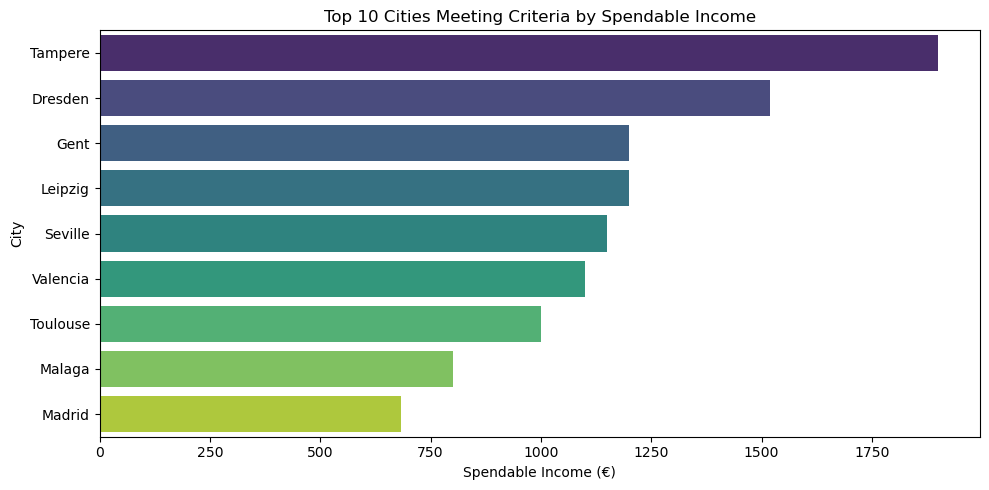

In [16]:
#Filter cities meeting the required conditions
qualified_cities = city_data[
    (city_data['Average Monthly Salary'] > 2000) &  # Salary above €2000
    (city_data['Average Cost of Living'] <= 1600)   # Cost of living below or equal to €1600
].copy()

#Sort and inspect the top options
print("Top 10 Cities Meeting the Conditions (Sorted by Spendable Income):")
display(
    qualified_cities.sort_values(by='Spendable Income', ascending=False)[
        ['City', 'Country', 'Average Monthly Salary', 'Average Cost of Living', 'Spendable Income', 'Unemployment Rate']
    ].head(10)
)

print("\nTop 10 Cities with Lowest Unemployment Among the Qualified Ones:")
display(
    qualified_cities.sort_values(by='Unemployment Rate', ascending=True)[
        ['City', 'Country', 'Average Monthly Salary', 'Average Cost of Living', 'Spendable Income', 'Unemployment Rate']
    ].head(10)
)

#Spendable Income of Qualified Cities
plt.figure(figsize=(10, 5))
sns.barplot(
    data=qualified_cities.sort_values(by='Spendable Income', ascending=False).head(10),
    x='Spendable Income',
    y='City',
    hue='City',
    palette='viridis',
    legend=False
)
plt.title('Top 10 Cities Meeting Criteria by Spendable Income')
plt.xlabel('Spendable Income (€)')
plt.ylabel('City')
plt.tight_layout()
plt.show()


The dataset was filtered to include only cities where the average monthly salary exceeds €2000 and the cost of living is below or equal to €1600.  
These criteria ensure that only economically favorable cities remain for evaluation.  
Among these cities, we examine two perspectives:  
- Those with the highest spendable income, where residents retain more money after living expenses
- Those with the lowest unemployment rates, representing stronger job stability  

This two-step view allows us to identify both financially rewarding and secure cities before selecting the overall best option.

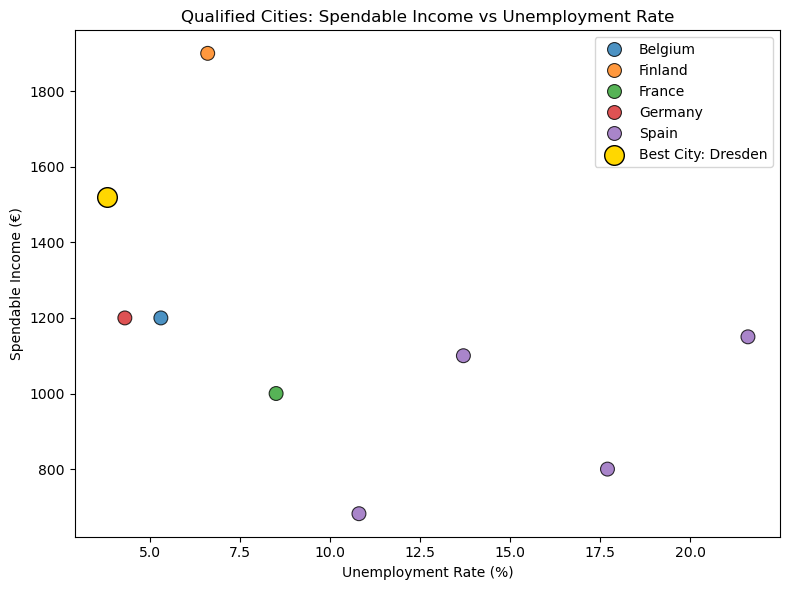


 Best Overall City Recommendation 
City: Dresden, Germany
- Average Monthly Salary: €3050.00
- Average Cost of Living: €1530.00
- Spendable Income: €1520.00
- Unemployment Rate: 3.8%

 This city offers the best balance between high income, affordable living costs, and low unemployment among all options.


In [17]:
#Select the best overall city
#Prioritize lowest unemployment rate, then highest spendable income
best_city = (
    qualified_cities
    .sort_values(by=['Unemployment Rate', 'Spendable Income'], ascending=[True, False])
    .iloc[0]
)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=qualified_cities,
    x='Unemployment Rate',
    y='Spendable Income',
    hue='Country',
    s=100,
    alpha=0.8,
    edgecolor='black'
)

# Highlight the best city
plt.scatter(
    best_city['Unemployment Rate'],
    best_city['Spendable Income'],
    color='gold',
    s=200,
    edgecolor='black',
    label=f"Best City: {best_city['City']}"
)

# Titles and labels
plt.title('Qualified Cities: Spendable Income vs Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Spendable Income (€)')
plt.legend()
plt.tight_layout()
plt.show()


#Present results
print("\n Best Overall City Recommendation ")
print(f"City: {best_city['City']}, {best_city['Country']}")
print(f"- Average Monthly Salary: €{best_city['Average Monthly Salary']:.2f}")
print(f"- Average Cost of Living: €{best_city['Average Cost of Living']:.2f}")
print(f"- Spendable Income: €{best_city['Spendable Income']:.2f}")
print(f"- Unemployment Rate: {best_city['Unemployment Rate']:.1f}%")
print("\n This city offers the best balance between high income, affordable living costs, and low unemployment among all options.")



The selected city achieves the best overall balance between salary, cost of living, and unemployment rate.  
It provides strong earning potential, affordable expenses, and a favorable job market, making it the ideal destination for someone seeking both economic stability and quality of life.  
This analysis demonstrates how combining multiple socioeconomic indicators can produce a more meaningful ranking than relying on salary or cost alone.  


### 1.5 Additional Insights

In this section, we explore three additional questions to deepen our understanding of European cities.

#### 1.5.1 Cost of Living vs Population Density

In [18]:
fig2 = px.scatter(city_data, x='Population Density', y='Average Cost of Living', title ='Cost of Living vs Population Density', labels={'Population Density':'Population Density (people per sq km)', 'Average Cost of Living':'Average Cost of Living (€)'}, hover_name='City', hover_data=['Country'])
fig2.show()

There is a general trend where cities with higher population density also experience higher costs of living.  
This supports the idea that densely populated urban centers tend to have more expensive housing and services.

## Review this acima, with the chat and this plot 

#### 1.5.2 Salary vs Unemployment Rate

In [19]:
fig3 = px.scatter(city_data, x='Average Monthly Salary', y='Unemployment Rate', title='Average Monthly Salary vs Unemployment Rate', labels={'Average Monthly Salary':'Average Monthly Salary(€)', 'Unemployment Rate':'Unemployment Rate (%)'}, hover_name='City', hover_data=['Country'])
fig3.show()

Cities with higher salaries generally have lower unemployment rates.  
This suggests that stronger economies not only pay better but also provide more job opportunities.

#### 1.5.3 Youth Dependency Ratio by Country

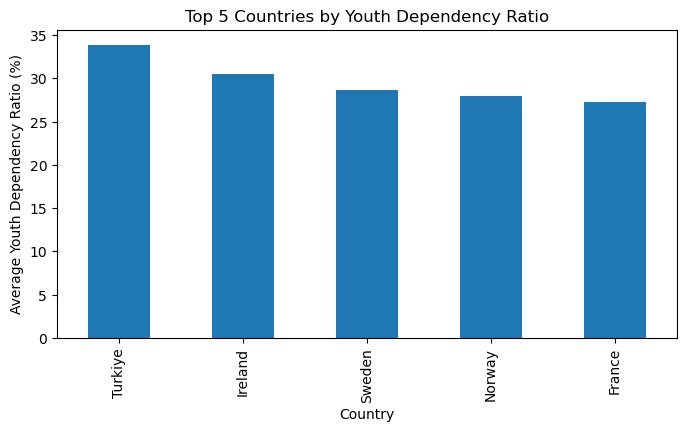

In [20]:
avg_youth = city_data.groupby('Country')['Youth Dependency Ratio'].mean().sort_values(ascending=False).head(5)
avg_youth.plot(kind='bar', figsize=(8,4))
plt.title('Top 5 Countries by Youth Dependency Ratio')
plt.ylabel('Average Youth Dependency Ratio (%)')
plt.show()

These countries have relatively younger populations, which could influence future labor market growth and education needs.  
This indicator is valuable for understanding demographic trends and long-term economic potential.

#### 1.5.4 True Personal Wealth vs National Wealth: GDP vs Spendable Income

In [21]:
fig4 = px.scatter(city_data, x = 'GDP per Capita', y = 'Spendable Income', title='GDP vs Personal Wealth', labels= {'GDP per Capita':'GDP per Capita', 'Spendable Income': 'Spendable Income'}, hover_name='City', hover_data= ['Country']) # creating the scatter plot as it's the most suitable to show a relationship between 2 numerical variables
fig4.show()

The GDP per Capita usually represents a weathy country and or city, however that does not always reflect on our own wealth so it will be usefull to compare the GDP to the Spendable Income, in order to not be fooled by thinking of living in a city that has a high GDP per Capita without knowing if it truly reflects on true personal wealth.  

From the scatter plot we can see that there is a positive correlation between GDP per Capita and Spendable Income, which makes sense as wealthier cities/countries tend to have higher salaries and affordable living costs, leading to more spendable income for their residents. However, there are some outliers where cities with high GDP per Capita have relatively low Spendable Income, indicating that high national wealth does not always translate to personal wealth for individuals living in those cities.

# Por agora esta assim 